In [ ]:
#training another model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [7]:
df = pd.read_csv("enhanced_dataset.csv")


X = df.drop(columns=["Outcome", "Outcome_Num"])
y = df["Outcome_Num"]

df.head()


,Blood Pressure (Sys),Blood Pressure (Dia),Pulse (HR),Temperature,Cervical Dilation (cm),Uterine Contractions (/10min),Fetal Heart Rate (FHR),Station/Descent of Head,Amniotic Fluid,SpO2,...,Uterus Tone,Urine Output (ml/hr),Hydration (ml/day),Pain Level (0-10),Breast Engorgement (0-10),Fatigue Level (0-10),"Mood (0=happy,10=depressed)",Bowel/Urinary Issues (0-10),Outcome,Outcome_Num
0,105.07,63.11,114.17,36.75,1.65,0.92,143.25,1.12,10.16,98.76,...,3.97,33.63,2831.39,3.29,0.50,1.78,2.69,1.25,Stable,0
1,102.40,64.01,108.50,36.02,13.04,2.87,141.33,1.60,15.82,99.70,...,2.98,48.94,2544.68,0.19,1.17,2.09,2.97,1.06,Moderate,1
2,137.64,108.53,117.56,45.23,20.98,14.88,179.78,8.30,24.81,114.55,...,17.37,78.07,3011.78,17.43,10.96,23.64,20.49,11.59,Critical,2
3,115.65,60.62,95.93,36.29,2.45,0.31,99.65,2.67,13.16,95.62,...,2.03,32.67,2701.31,2.70,3.20,0.93,0.45,3.51,Stable,0
4,95.47,78.09,99.56,36.58,4.75,3.40,143.00,12.20,9.55,99.63,...,2.13,49.58,3006.92,1.31,1.46,0.25,2.29,3.88,Moderate,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    random_state=42,
    class_weight="balanced"   # handle imbalance if any
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [9]:
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       134
           1       0.93      0.92      0.92       133
           2       1.00      1.00      1.00       133

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400


Confusion Matrix:
 [[125   9   0]
 [ 11 122   0]
 [  0   0 133]]


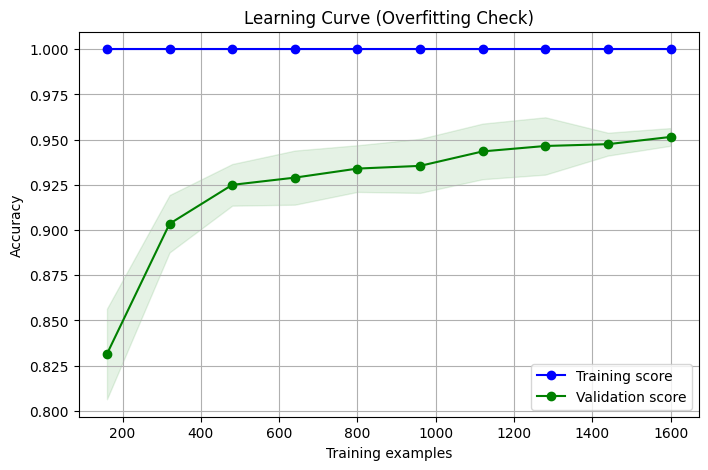

Cross-validation scores: [0.95   0.9525 0.96   0.945  0.95  ]
Mean CV accuracy: 0.9514999999999999


In [10]:
# -------------------------------
# Overfitting Check (Learning Curve)
# -------------------------------
def check_overfitting(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    # Mean ± Std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, val_mean, 'o-', color="green", label="Validation score")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.1, color="green")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve (Overfitting Check)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())

# Call the overfitting check
check_overfitting(model, X, y)

In [11]:
import pickle
with open("health_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("✅ Model saved as fetal_health_model.pkl")

✅ Model saved as fetal_health_model.pkl
